In [2]:
import sys
import math

import torch
import numpy as np
import matplotlib.pyplot as plt
import dsdl
import gpytorch
import tqdm


from torcheval.metrics import BinaryAUROC

sys.path.append("..")

from src._97_gpytorch import LogisticGPVI, GPModel, LogitLikelihood, PGLikelihood

%load_ext autoreload
%autoreload 2

In [39]:
data = dsdl.load("breast-cancer")

In [40]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
Xstd = X.std(dim=0)
Xmean = X.mean(dim=0)
X = (X - Xmean) / Xstd
y = torch.tensor(y, dtype=torch.float)
y[y == 2] = 0
y[y == 4] = 1

In [67]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=200, verbose=False)
f0.fit()
f0.runtime

6.339436292648315

In [68]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f1.fit()
f1.runtime

5.1853251457214355

In [69]:
y_pred = f0.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9544, dtype=torch.float64)


In [70]:
y_pred = f1.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.9554, dtype=torch.float64)


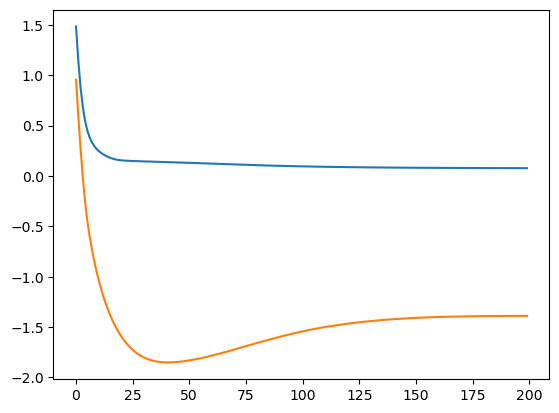

In [71]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [72]:
lower, upper = f0.credible_intervals(X)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X)
print( (upper - lower).mean() )

tensor(0.7430)
tensor(0.5389)


# Diabetes dataset

In [85]:
data = dsdl.load("diabetes_scale")

In [87]:
X, y = data.get_train()
X = X.todense()

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
y[y == -1] = 0

In [99]:
f0 = LogisticGPVI(y, X, n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f0.fit()
f0.runtime

7.856612682342529

In [100]:
f1 = LogisticGPVI(y, X, likelihood=PGLikelihood(), n_inducing=50, n_iter=200, thresh=1e-6, verbose=False)
f1.fit()
f1.runtime

6.624014854431152

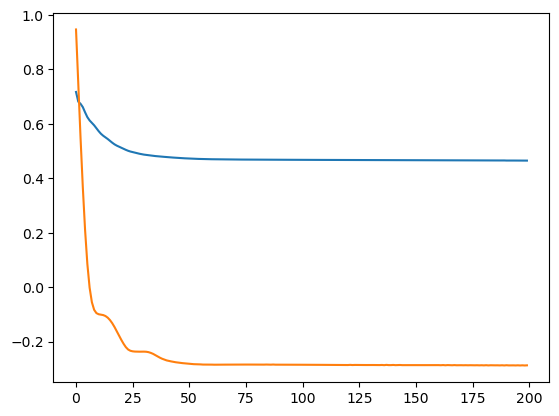

In [101]:
plt.plot(f0.loss)
plt.plot(f1.loss)

In [102]:
y_pred = f0.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.6728, dtype=torch.float64)


In [103]:
y_pred = f1.predict(X)

auc = BinaryAUROC()
auc.update(y, y_pred)
print(auc.compute())

tensor(0.6722, dtype=torch.float64)


In [104]:
lower, upper = f0.credible_intervals(X)
print( (upper - lower).mean() )

lower, upper = f1.credible_intervals(X)
print( (upper - lower).mean() )

tensor(1.0226)
tensor(0.8558)
